# Project 2 - Ames Housing Data Project

### Data Science Process:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

## Step 1. Define the problem


Using a dataset including 80 features provided by the Ames City Assessor’s Office, are we able to build a model that can accurately predict housing prices in Ames, Iowa?


## Step 2. Import and Clean Data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ames_train_df = pd.read_csv('./datasets/train.csv')

In [3]:
ames_test_df = pd.read_csv('./datasets/test.csv')

In [4]:
# Source: https://medium.com/@jobethmuncy/different-ways-to-view-a-pandas-dataframe-528d193b7320 (Thanks, Jobeth!)
pd.set_option('display.max_columns', None)
ames_train_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [5]:
ames_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
ames_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


## Quick and Dirty First Model Attempt

First, lets just replace all missing values with 0.

In [7]:
# si_num = SimpleImputer(strategy='constant', fill_value=0)

In [8]:
# ames_train_df_zeros = pd.DataFrame(si_num.fit_transform(ames_train_df), columns=ames_train_df.columns)

In [9]:
# ames_train_df_zeros.head()

In [10]:
X = ames_train_df.select_dtypes(exclude='object').drop(columns = 'SalePrice')
y = ames_train_df['SalePrice']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
si_num = SimpleImputer()

In [13]:
X_train_si = si_num.fit_transform(X_train)
X_test_si = si_num.transform(X_test)

In [14]:
pipe = make_pipeline(SelectKBest(f_regression),
                    SVR())

params = {
    'selectkbest__k': range(1,25),
    'svr__C': [.01, .1, 1, 10, 100, 1000, 10000]
}

gs = GridSearchCV(pipe, params, n_jobs=-1)
gs.fit(X_train_si, y_train)

print('Train Best', gs.best_score_)
print('Test Score', gs.score(X_test_si, y_test))
gs.best_params_

Train Best 0.7536769691412076
Test Score 0.7626745230965211


{'selectkbest__k': 17, 'svr__C': 10000}

In [15]:
y_preds = gs.predict(X_test_si)

In [16]:
mean_squared_error(y_test, y_preds,squared=True)

1442873831.8679457

In [17]:
X_real_test = ames_test_df.select_dtypes(exclude='object')

In [18]:
X_real_test_si = si_num.transform(X_real_test)

In [19]:
y_test_preds = gs.predict(X_real_test_si)

In [20]:
ames_test_df['y_test_preds'] = y_test_preds

In [21]:
ames_test_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,y_test_preds
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,186991.611240
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,258028.268336


In [22]:
first_attempt = ames_test_df[['Id', 'y_test_preds']]

In [23]:
first_attempt.head()

,Id,y_test_preds
0,2658,186991.611240
1,2718,258028.268336
2,2414,156128.535319
3,1989,123265.775961
4,625,194041.996043


In [24]:
first_attempt.columns = ['Id', 'SalePrice']

In [25]:
first_attempt.to_csv('./uploads/first_attempt.csv', index=False)

In [26]:
si_num

SimpleImputer()

In [27]:
ames_train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Filling Missing Values

In [28]:
ames_train_df_num = ames_train_df.select_dtypes(exclude='object').replace(np.nan, 0)

In [29]:
ames_train_df_str = ames_train_df.select_dtypes(include='object').replace(np.nan, 'none')

In [30]:
ames_train_df_nona = pd.concat([ames_train_df_num, ames_train_df_str],axis=1)

In [31]:
ames_test_df_num = ames_test_df.select_dtypes(exclude='object').replace(np.nan, 0)

In [32]:
ames_test_df_str = ames_test_df.select_dtypes(include='object').replace(np.nan, 'none')

In [33]:
ames_test_df_nona = pd.concat([ames_test_df_num, ames_test_df_str],axis=1)

## EDA

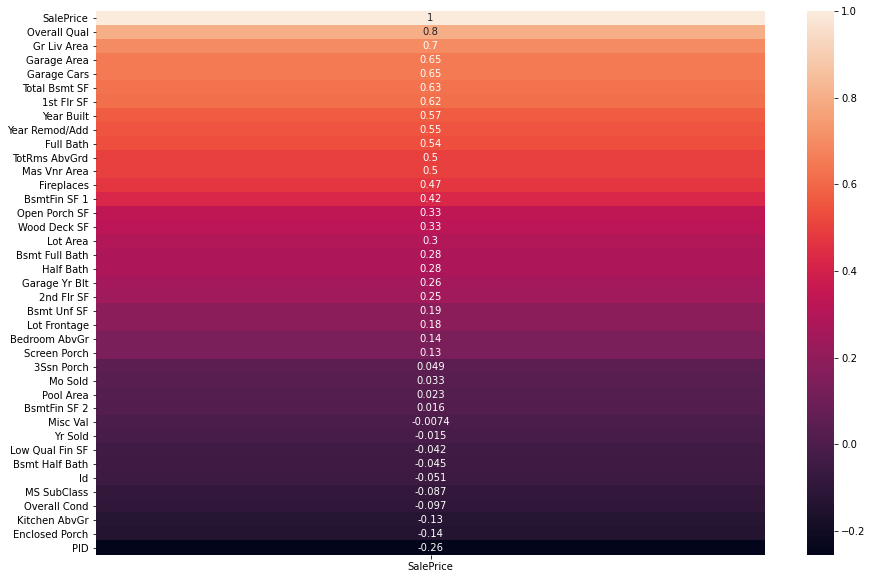

In [34]:
plt.subplots(figsize=(15,10))
sns.heatmap(ames_train_df_nona.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)

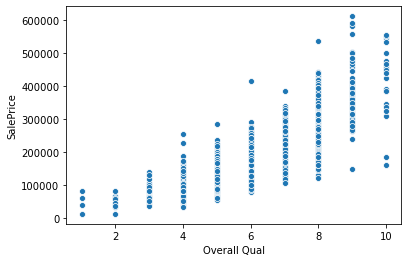

In [35]:
sns.scatterplot('Overall Qual', 'SalePrice', data=ames_train_df_nona)

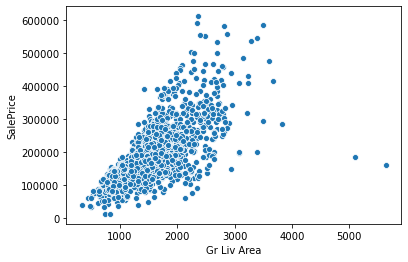

In [36]:
sns.scatterplot('Gr Liv Area', 'SalePrice', data=ames_train_df_nona)

In [37]:
# Dropping those few outliers

In [38]:
ames_train_df_nona = ames_train_df_nona[ames_train_df_nona['Gr Liv Area'] < 4000]

In [39]:
ames_train_df_nona['HouseAge'] = 2020-ames_train_df_nona['Year Built']

In [40]:
ames_train_df_nona.head(2)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,HouseAge
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,RL,Pave,none,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,none,Attchd,RFn,TA,TA,Y,none,none,none,WD,44
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,RL,Pave,none,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,none,none,none,WD,24


In [41]:
ames_test_df_nona['HouseAge'] = 2020-ames_test_df_nona['Year Built']

## Attempt #2

In [42]:
X2 = ames_train_df_nona[['Gr Liv Area', 'Overall Qual', 'HouseAge']]

In [43]:
y = ames_train_df_nona['SalePrice']

In [44]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=22)

In [45]:
ss = StandardScaler()

In [46]:
pipe = make_pipeline(StandardScaler(),
                    SVR())

params = {
    'svr__C': [.01, .1, 1, 10, 100, 1000, 10000]
}

gs = GridSearchCV(pipe, params, n_jobs=-1)
gs.fit(X2_train, y_train)

print('Train Best', gs.best_score_)
print('Test Score', gs.score(X2_test, y_test))
gs.best_params_

Train Best 0.7710696978612684
Test Score 0.8243414512856673


{'svr__C': 10000}

In [47]:
X_real_test2 = ames_test_df_nona[['Gr Liv Area', 'Overall Qual', 'HouseAge']]

In [48]:
y2_test_preds = gs.predict(X_real_test2)

In [49]:
ames_test_df_nona['SalePrice'] = y_test_preds

In [50]:
ames_test_df_nona[['Id','SalePrice']]

,Id,SalePrice
0,2658,186991.611240
1,2718,258028.268336
2,2414,156128.535319
3,1989,123265.775961
4,625,194041.996043
...,...,...
873,1662,214148.748909
874,1234,227652.385896
875,1373,132800.232118
876,1672,125611.799208


In [51]:
second_attempt = ames_test_df_nona[['Id','SalePrice']]

In [52]:
second_attempt.to_csv('./uploads/second_attempt.csv', index=False)

In [53]:
pipe2 = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                    Lasso())

params2 = {
    'lasso__alpha': [.01, .1, 1, 10, 100, 1000]
}

gs = GridSearchCV(pipe2, params2, n_jobs=-1)
gs.fit(X2_train, y_train)

print('Train Best', gs.best_score_)
print('Test Score', gs.score(X2_test, y_test))
gs.best_params_

Train Best 0.8241828717467623
Test Score 0.8316454971184283


{'lasso__alpha': 100}

In [59]:
pipe2 = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                    KNeighborsRegressor())

params2 = {
    'kneighborsregressor__n_neighbors': [1, 3, 5, 7, 9]
}

gs = GridSearchCV(pipe2, params2, n_jobs=-1)
gs.fit(X2_train, y_train)

print('Train Best', gs.best_score_)
print('Test Score', gs.score(X2_test, y_test))
gs.best_params_

Train Best 0.8216136757561685
Test Score 0.8402206384262872


{'kneighborsregressor__n_neighbors': 7}